# Interactive influence lines #

see https://icozct.tudelft.nl/TUD_CT/CT3109/tentamens/files/3109-1104-2022.pdf

In [2]:
import sympy as sp

In [3]:
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import widgets, interact
from matplotlib.patches import Arc,StepPatch

In [21]:
EI, x = sp.symbols('EI, x',real=True)

In [22]:
Av, Am, Bv, Cv = sp.symbols('Av, Am, Bv, Cv',real=True)
a= sp.symbols('a',positive=True,real=True)
C1, C2, C3, C4, C5 = sp.symbols('C1, C2, C3, C4, C5')
EI = 1500

##  Influence line support reaction A ##

In [23]:
q = -Am*sp.SingularityFunction(x,0,-2)-Av*sp.SingularityFunction(x,0,-1) - Bv * sp.SingularityFunction(x,5,-1) - Cv * sp.SingularityFunction(x,8,-1) + 1 * sp.SingularityFunction(x,a,-1)
display(q)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+ C3 + C5 * sp.SingularityFunction(x,2,0)
w = - sp.integrate(phi,x)+C4
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(phi.subs(x,0),0)
eq3 = sp.Eq(w.subs(x,5),0)
eq4 = sp.Eq(w.subs(x,8),0)
eq5 = sp.Eq(M.subs(x,2),0)
eq6 = sp.Eq(M.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,-1),0)
eq8 = sp.Eq(M.subs(x,13),0)
eq9 = sp.Eq(V.subs(x,13),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9],[C1,C2,C3,C4,C5,Am,Av,Bv,Cv])
Av_sol = sol[Av]
Am_sol = sol[Am]
Bv_sol = sol[Bv]
Cv_sol = sol[Cv]
display(Cv_sol)
Av_numpy = sp.lambdify(a,Av_sol.rewrite(sp.Piecewise))
Am_numpy = sp.lambdify(a,Am_sol.rewrite(sp.Piecewise))
Bv_numpy = sp.lambdify(a,Bv_sol.rewrite(sp.Piecewise))
Cv_numpy = sp.lambdify(a,Cv_sol.rewrite(sp.Piecewise))

-Am*SingularityFunction(x, 0, -2) - Av*SingularityFunction(x, 0, -1) - Bv*SingularityFunction(x, 5, -1) - Cv*SingularityFunction(x, 8, -1) + SingularityFunction(x, a, -1)

25*SingularityFunction(2, a, 1)/372 - SingularityFunction(5, a, 3)/62 + SingularityFunction(8, a, 3)/124 + 1127*SingularityFunction(13, a, 0)/372 - 151*SingularityFunction(13, a, 1)/372

Piecewise((a**2*(a - 6)/124, a < 2), ((3*a**3 - 18*a**2 + 25*a - 50)/372, a < 5), ((151*a - 3*(a - 8)**3 - 836)/372, a < 8), ((151*a - 836)/372, a < 13), (0, True))

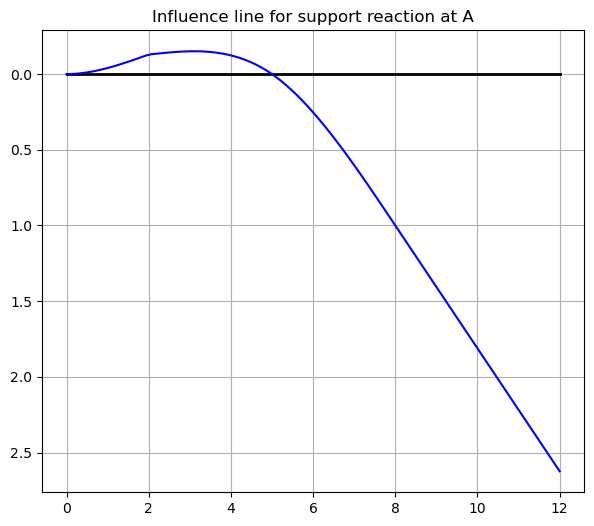

In [31]:
x_plot = np.linspace(0,12,100)
fig, axs = plt.subplots(1, 1, figsize=(7, 6))
axs.plot([0,12],[0,0],color='black',linewidth=2)
axs.grid()
axs.plot(x_plot,Cv_numpy(x_plot),color='blue')
axs.invert_yaxis()
title1 = 'Influence line for support reaction at A'
axs.set_title(title1)
display(Cv_sol.rewrite(sp.Piecewise).simplify())

##  Finding influence line for V ##

Piecewise((9*(x - 8)/124, x > 8), ((-x**3 + 24*x**2 - 183*x + 440)/124, x > 5), ((x**3 - 6*x**2 - 33*x + 190)/124, x > 4.999999), ((x**3 - 6*x**2 - 33*x + 66)/124, x > 2), (x**2*(x - 6)/124, x > 0), (0, True))

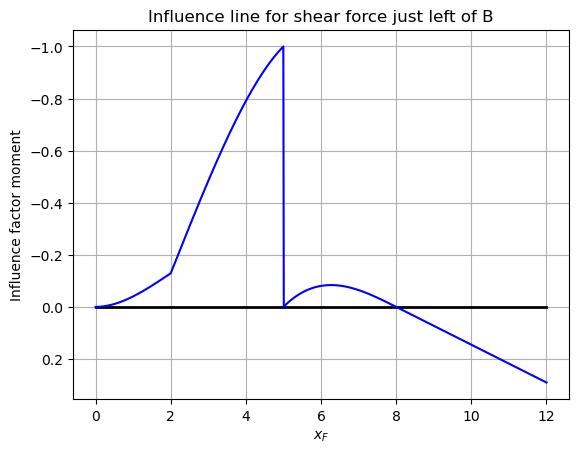

In [43]:
q = -Am*sp.SingularityFunction(x,0,-2)-Av*sp.SingularityFunction(x,0,-1) - Bv * sp.SingularityFunction(x,5,-1) - Cv * sp.SingularityFunction(x,8,-1)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+ C3 + C5 * sp.SingularityFunction(x,2,0)
w = - sp.integrate(phi,x)+C4 + sp.SingularityFunction(x,a,0)
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(phi.subs(x,0),0)
eq3 = sp.Eq(w.subs(x,5),0)
eq4 = sp.Eq(w.subs(x,8),0)
eq5 = sp.Eq(M.subs(x,2),0)
eq6 = sp.Eq(M.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,-1),0)
eq8 = sp.Eq(M.subs(x,13),0)
eq9 = sp.Eq(V.subs(x,13),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9],[C1,C2,C3,C4,C5,Am,Av,Bv,Cv])
w_sol = w.subs(sol)
M_inf_numpy = sp.lambdify([a,x],w_sol.rewrite(sp.Piecewise))
display(w_sol.subs(a,4.999999).rewrite(sp.Piecewise).simplify())

x_plot = np.linspace(0,12,1000)
plt.plot([0,12],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_inf_numpy(a=4.9999999,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for shear force just left of B'
axs.set_title(title0);

# Find influence line $w$

-Am*SingularityFunction(x, 0, -2) - Av*SingularityFunction(x, 0, -1) - Bv*SingularityFunction(x, 5, -1) - Cv*SingularityFunction(x, 8, -1) + SingularityFunction(x, a, -1)

Piecewise(((x - 8)/7750, x > 8), ((-x**3 + 24*x**2 - 183*x + 440)/69750, x > 5), ((x**3 - 6*x**2 - 33*x + 190)/69750, x > 2), (3*x**2*(6 - x)/31000, x > 0), (0, True))

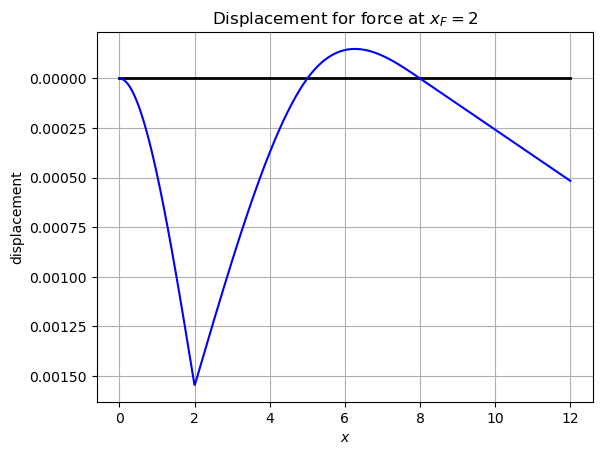

In [41]:
q = -Am*sp.SingularityFunction(x,0,-2)-Av*sp.SingularityFunction(x,0,-1) - Bv * sp.SingularityFunction(x,5,-1) - Cv * sp.SingularityFunction(x,8,-1) + 1 * sp.SingularityFunction(x,a,-1)
display(q)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+ C3 + C5 * sp.SingularityFunction(x,2,0)
w = - sp.integrate(phi,x)+C4
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(phi.subs(x,0),0)
eq3 = sp.Eq(w.subs(x,5),0)
eq4 = sp.Eq(w.subs(x,8),0)
eq5 = sp.Eq(M.subs(x,2),0)
eq6 = sp.Eq(M.subs(x,-1),0)
eq7 = sp.Eq(V.subs(x,-1),0)
eq8 = sp.Eq(M.subs(x,13),0)
eq9 = sp.Eq(V.subs(x,13),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9],[C1,C2,C3,C4,C5,Am,Av,Bv,Cv])
w_sol = w.subs(sol)
w_numpy = sp.lambdify([a,x],w_sol.rewrite(sp.Piecewise))

display(w_sol.subs(a,2).rewrite(sp.Piecewise).simplify())
x_plot = np.linspace(0,12,1000)
plt.plot([0,12],[0,0],color='black',linewidth=2)
plt.plot(x_plot,w_numpy(a=2,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('displacement')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Displacement for force at $x_F =  2 $'
axs.set_title(title0);

In [57]:
x, a, q, F_dummy, EI = sp.symbols('x, a, q, F_dummy, EI')

In [59]:
MAC = (q/2+F_dummy)*(x/a-1)
MBC = -q*(a*3-x)**2/2+(a*3-x)/2
display(MAC)
dMACdx = MAC.diff(F_dummy)
dMBCdx = MBC.diff(F_dummy)
display(dMACdx)
display(dMBCdx.simplify())
w = sp.integrate(MAC*dMACdx/EI,(x,0,a)) + sp.integrate(MBC*dMBCdx/EI,(x,a,2*a))
display(w.simplify())

(-1 + x/a)*(F_dummy + q/2)

-1 + x/a

0

a*(2*F_dummy + q)/(6*EI)